Optimal solution: [1.0023824108695687, 1.9999995053590591, 1.0023824108695687]


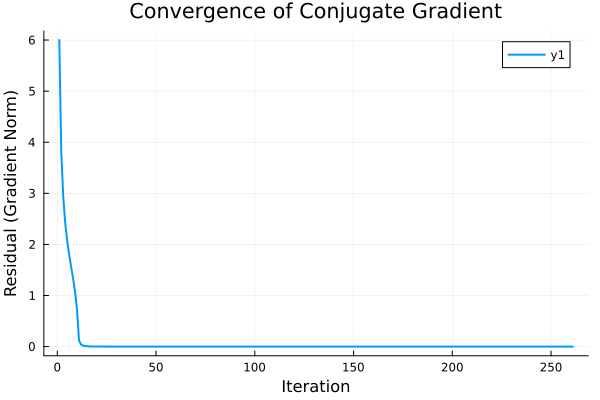

In [1]:
using LinearAlgebra
using Plots

# Define the cost function and its gradient
function f(x, a, b)
    return a * (x[1] - 1)^4 + (x[2] - 2)^2 + b * (x[3] - 1)^4
end

function gradient_f(x, a, b)
    grad_x1 = 4 * a * (x[1] - 1)^3
    grad_x2 = 2 * (x[2] - 2)
    grad_x3 = 4 * b * (x[3] - 1)^3
    return [grad_x1, grad_x2, grad_x3]
end

# Conjugate Gradient method
function conjugate_gradient(x0, a, b; tol=1e-6, max_iters=1000)
    x = x0
    g = gradient_f(x, a, b)
    d = -g
    residuals = [norm(g)]

    for k in 1:max_iters
        if norm(g) < tol
            break
        end

        alpha = -dot(g, d) / dot(d, gradient_f(x + d, a, b) - g)
        x_new = x + alpha * d
        g_new = gradient_f(x_new, a, b)
        beta = dot(g_new, g_new) / dot(g, g)
        d = -g_new + beta * d

        x = x_new
        g = g_new

        # Track residuals for convergence plot
        residuals = append!(residuals, norm(g))
    end

    return x, residuals
end

# Parameters
a = 1.0
b = 1.0
x0 = [2.0, 3.0, 2.0]  # Initial point

# Perform Conjugate Gradient optimization
x_opt, residuals = conjugate_gradient(x0, a, b)
println("Optimal solution: ", x_opt)

# Plot the convergence (residuals)
plot(residuals, xlabel="Iteration", ylabel="Residual (Gradient Norm)", title="Convergence of Conjugate Gradient", lw=2)